In [83]:
# Python Version 3.11.4, conda version 23.1.0

In [162]:
import pandas as pd # v 1.4.4
import statsmodels as st # v 0.13.2
import sklearn as sk #v 1.0.2
import statsmodels.api as sm #v 0.13.2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE

In [164]:
df = pd.read_csv("/Users/maiavachon/Documents/GitHub/DATA-300-Statistical-Machine-Learning-Fall-2023-/Data/loan_default_data_set.csv")
df.drop('rep_education', axis=1, inplace=True)
df.dropna(inplace=True)

In [165]:
#1a. oversampling technique #1

#grouped dataset by Def_ind
by_class = df.groupby('Def_ind')

#split dataset into two separate datasets
defaulted = by_class.get_group(1) #2000 observations
not_defaulted = by_class.get_group(0) #18000 observations

#oversample the minority class (defaulted) to match the length of not_defaulted, allows for replacement and reproduceability
oversampled_defaulted = defaulted.sample(n=len(not_defaulted), replace=True, random_state=10)

#concatenate the new oversampled minority class to the majority dataset
oversampled_df = pd.concat([oversampled_defaulted, not_defaulted])


In [166]:
#1b. undersampling technique

#undersample the majority class (not_defaulted) to match the length of defaulted, allows for replacement and reproduceability
undersampled_not_defaulted = not_defaulted.sample(n=len(defaulted), replace=True, random_state=10)

#concatenate the new undersampled majority class to the minority dataset
undersampled_df = pd.concat([defaulted, undersampled_not_defaulted])

In [167]:
#1c. oversampling technique #2

X = df.drop(columns=['Def_ind'])
y = df['Def_ind'] 

#create an instance of SMOTE that can be replicable (random state) and is sampled automatically (resample all classes except for majority)
smote = SMOTE(sampling_strategy='auto', random_state=10)

#create new dataset by oversampling using SMOTE
X_smote, y_smote = smote.fit_resample(X, y)

In [168]:
#2. model fitting for option #1

#LOGISTIC REGRESSION

#create subsets of data, and split between testing and training sets
y1 = oversampled_df["Def_ind"] #create subset of data, only Def_ind
X1 = oversampled_df.loc[:, oversampled_df.columns != "Def_ind"] #create subset of data, everything but Def_ind
X1_train, X1_test, y1_train, y1_test = sk.model_selection.train_test_split(X1, y1, test_size=0.3, random_state=10) #split the data into training and testing sets

#fit the model, max_iter needs to be higher to accommodate a higher number of iterations, random_state ensures replicability
logmodel1 = LogisticRegression(max_iter=1000, random_state=10)
logmodel1.fit(X1_train, y1_train) #fit the model
y1_pred = logmodel1.predict(X1_test) #predict values

#LINEAR DISCRIMINANT ANALYSIS

#create subsets of data, and split between testing and training sets
y2 = oversampled_df["Def_ind"] #create subset of data, only Def_ind
X2 = oversampled_df.loc[:, oversampled_df.columns != "Def_ind"] #create subset of data, everything but Def_ind
X2_train, X2_test, y2_train, y2_test = sk.model_selection.train_test_split(X2, y2, test_size=0.3, random_state=10) #split the data into training and testing sets

lda1 = LinearDiscriminantAnalysis()
lda1.fit(X2_train, y2_train) #fit the LDA model on training set
lda1_pred = lda1.predict(X2_test) #predict values

In [169]:
#2. model fitting for option #2

#LOGISTIC REGRESSION

#create subsets of data, and split between testing and training sets
y3 = oversampled_df["Def_ind"] #create subset of data, only Def_ind
X3 = oversampled_df.loc[:, oversampled_df.columns != "Def_ind"] #create subset of data, everything but Def_ind
X3_train, X3_test, y3_train, y3_test = sk.model_selection.train_test_split(X3, y3, test_size=0.3, random_state=10) #split the data into training and testing sets

#fit the model, max_iter needs to be higher to accommodate a higher number of iterations, random_state ensures replicability
logmodel2 = LogisticRegression(max_iter=1000, random_state=10)
logmodel2.fit(X3_train, y3_train) #fit the model
y2_pred = logmodel2.predict(X3_test) #predict values

#LINEAR DISCRIMINANT ANALYSIS

#create subsets of data, and split between testing and training sets
y4 = undersampled_df["Def_ind"] #create subset of data, only Def_ind
X4 = undersampled_df.loc[:, undersampled_df.columns != "Def_ind"] #create subset of data, everything but Def_ind
X4_train, X4_test, y4_train, y4_test = sk.model_selection.train_test_split(X4, y4, test_size=0.3, random_state=10) #split the data into training and testing sets

lda2 = LinearDiscriminantAnalysis()
lda2.fit(X4_train, y4_train) #fit the LDA model on training set
lda2_pred = lda2.predict(X4_test) #predict values

In [170]:
#2. model fitting for option #3

#LOGISTIC REGRESSION

#split between testing and training sets
X5_train, X5_test, y5_train, y5_test = sk.model_selection.train_test_split(X_smote, y_smote, test_size=0.3, random_state=10) #split the data into training and testing sets

logmodel3 = LogisticRegression(max_iter=1000, random_state=10)
logmodel3.fit(X5_train, y5_train) #fit the model
y3_pred = logmodel3.predict(X5_test) #predict values

#LINEAR DISCRIMINANT ANALYSIS

X6_train, X6_test, y6_train, y6_test = sk.model_selection.train_test_split(X_smote, y_smote, test_size=0.3, random_state=10) #split the data into training and testing sets

lda3 = LinearDiscriminantAnalysis()
lda3.fit(X6_train, y6_train) #fit the LDA model on training set
lda3_pred = lda3.predict(X6_test) #predict values

In [171]:
#3. comparing model performance using scores

#method 1: find accuracy, precision, recall values -- weighted average based on class frequency
accuracy_1 = accuracy_score(y1_test, y1_pred)
precision_1 = precision_score(y1_test, y1_pred, average='weighted', zero_division=0) #zero_division = 0 accounts for the absence of samples in a class
recall_1 = recall_score(y1_test, y1_pred, average='weighted', zero_division=0)
#an accuracy score of 0.635 indicates that the model correctly predicted 63.5% of the the dataset. This is pretty good!
#a precision score of 0.644 indicates that when the model predicts a positive value, it is right 64.4% of the time. This is pretty good!
#a recall score of 0.635 indicates that the model correctly predicted 63.5% of the actual positive values in the dataset.

#method 2: find accuracy, precision, recall values -- weighted average based on class frequency
accuracy_2 = accuracy_score(y2_test, lda1_pred)
precision_2 = precision_score(y2_test, lda1_pred, average='weighted', zero_division=0) #zero_division = 0 accounts for the absence of samples in a class
recall_2 = recall_score(y2_test, lda1_pred, average='weighted', zero_division=0)
#an accuracy score of 0.7165 indicates that the model correctly predicted 71.65% of the the dataset. This is pretty good!
#a precision score of 0.7167 indicates that when the model predicts a positive value, it is right 71.67% of the time. This is pretty good!
#a recall score of 0.7165 indicates that the model correctly predicted 71.65% of the actual positive values in the dataset.

#method 3: find accuracy, precision, recall values -- weighted average based on class frequency
accuracy_3 = accuracy_score(y3_test, y2_pred)
precision_3 = precision_score(y3_test, y2_pred, average='weighted', zero_division=0) #zero_division = 0 accounts for the absence of samples in a class
recall_3 = recall_score(y3_test, y2_pred, average='weighted', zero_division=0)
#an accuracy score of 0.635 indicates that the model correctly predicted 63.5% of the the dataset. This is pretty good!
#a precision score of 0.644 indicates that when the model predicts a positive value, it is right 64.4% of the time. This is pretty good!
#a recall score of 0.635 indicates that the model correctly predicted 63.5% of the actual positive values in the dataset.

#method 4: find accuracy, precision, recall values -- weighted average based on class frequency
accuracy_4 = accuracy_score(y4_test, lda2_pred)
precision_4 = precision_score(y4_test, lda2_pred, average='weighted', zero_division=0) #zero_division = 0 accounts for the absence of samples in a class
recall_4 = recall_score(y4_test, lda2_pred, average='weighted', zero_division=0)
#an accuracy score of 0.729 indicates that the model correctly predicted 72.9% of the the dataset. This is the best so far!
#a precision score of 0.732 indicates that when the model predicts a positive value, it is right 73.2% of the time. This is pretty good!
#a recall score of 0.729 indicates that the model correctly predicted 72.9% of the actual positive values in the dataset.

#method 5: find accuracy, precision, recall values -- weighted average based on class frequency
accuracy_5 = accuracy_score(y5_test, y3_pred)
precision_5 = precision_score(y5_test, y3_pred, average='weighted', zero_division=0) #zero_division = 0 accounts for the absence of samples in a class
recall_5 = recall_score(y5_test, y3_pred, average='weighted', zero_division=0)
#an accuracy score of 0.636 indicates that the model correctly predicted 63.6% of the the dataset. This is okay.
#a precision score of 0.645 indicates that when the model predicts a positive value, it is right 64.5% of the time. This is good!
#a recall score of 0.636 indicates that the model correctly predicted 63.6% of the actual positive values in the dataset.

#method 6: find accuracy, precision, recall values -- weighted average based on class frequency
accuracy_6 = accuracy_score(y6_test, lda3_pred)
precision_6 = precision_score(y6_test, lda3_pred, average='weighted', zero_division=0) #zero_division = 0 accounts for the absence of samples in a class
recall_6 = recall_score(y6_test, lda3_pred, average='weighted', zero_division=0)
#an accuracy score of 0.759 indicates that the model correctly predicted 75.9% of the the dataset. This is okay.
#a precision score of 0.760 indicates that when the model predicts a positive value, it is right 76% of the time. This is good!
#a recall score of 0.759 indicates that the model correctly predicted 75.9% of the actual positive values in the dataset.

print("Technique 1 - Logistic Regression")
print("Accuracy: ", accuracy_1) 
print("Precision: ", precision_1)
print("Recall: ", recall_1)
print(" ")
print("Technique 1 - LDA")
print("Accuracy: ", accuracy_2) 
print("Precision: ", precision_2)
print("Recall: ", recall_2)
print(" ")
print("Technique 2 - Logistic Regression")
print("Accuracy: ", accuracy_3) 
print("Precision: ", precision_3)
print("Recall: ", recall_3)
print(" ")
print("Technique 2 - LDA")
print("Accuracy: ", accuracy_4) 
print("Precision: ", precision_4)
print("Recall: ", recall_4)
print(" ")
print("Technique 3 - Logistic Regression")
print("Accuracy: ", accuracy_5) 
print("Precision: ", precision_5)
print("Recall: ", recall_5)
print(" ")
print("Technique 3 - LDA")
print("Accuracy: ", accuracy_6) 
print("Precision: ", precision_6)
print("Recall: ", recall_6)

Technique 1 - Logistic Regression
Accuracy:  0.6346110987296635
Precision:  0.6445507277159174
Recall:  0.6346110987296635
 
Technique 1 - LDA
Accuracy:  0.7165143748607087
Precision:  0.7167294693275565
Recall:  0.7165143748607087
 
Technique 2 - Logistic Regression
Accuracy:  0.6346110987296635
Precision:  0.6445507277159174
Recall:  0.6346110987296635
 
Technique 2 - LDA
Accuracy:  0.7291462217860648
Precision:  0.7322664579952579
Recall:  0.7291462217860648
 
Technique 3 - Logistic Regression
Accuracy:  0.6355025629596612
Precision:  0.6445640432351363
Recall:  0.6355025629596612
 
Technique 3 - LDA
Accuracy:  0.759193224871852
Precision:  0.760098061258525
Recall:  0.759193224871852


Technique 1 - Logistic Regression


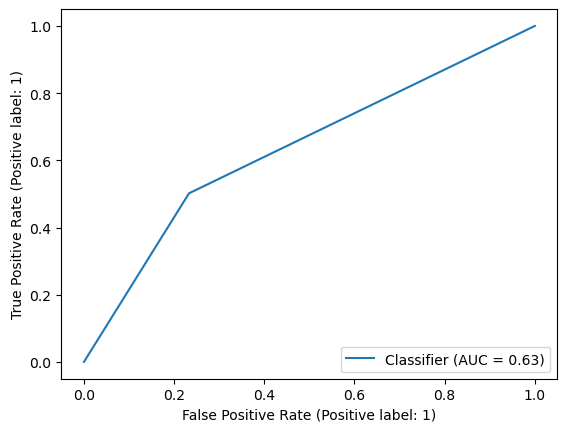

Technique 1 - LDA


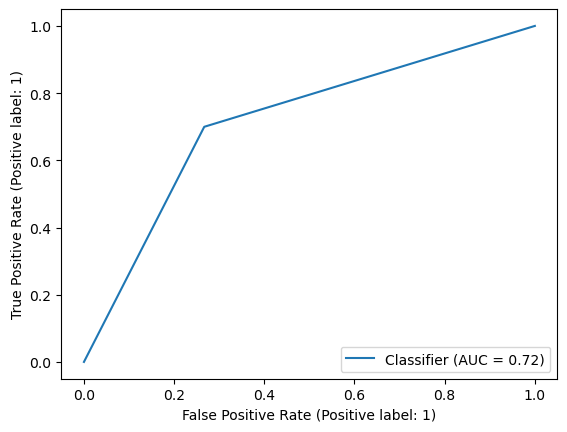

Technique 2 - Logistic Regression


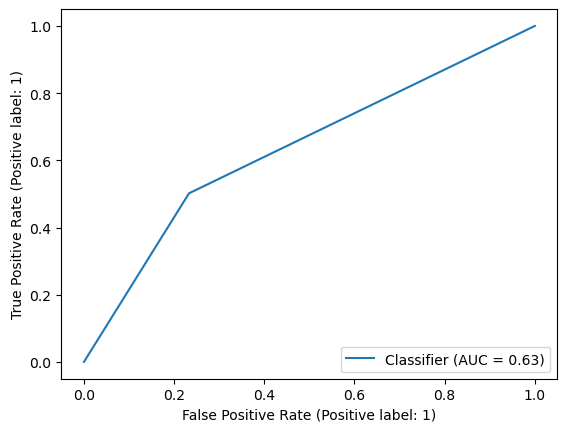

Technique 2 - LDA


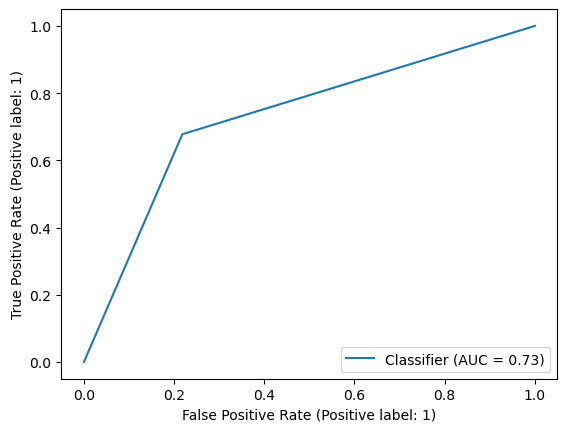

Technique 3 - Logistic Regression


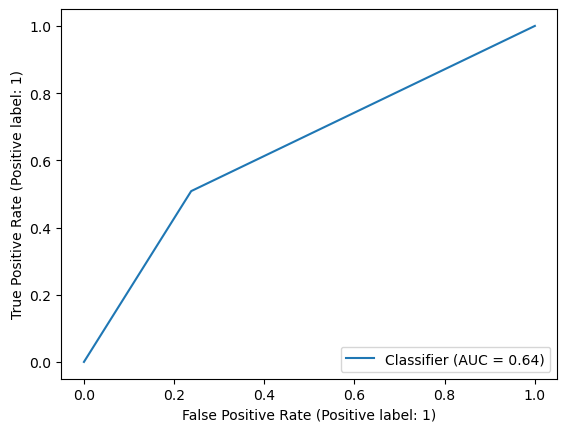

Technique 3 - LDA


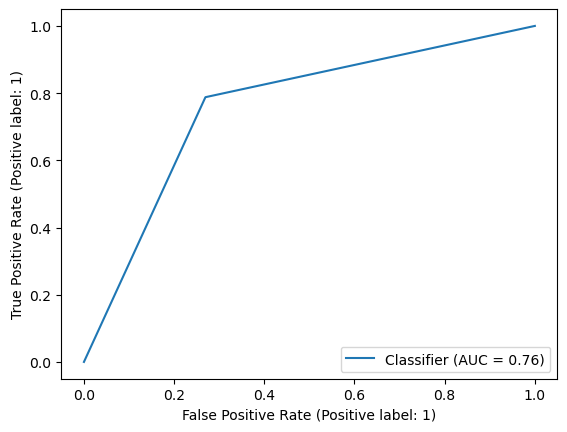

In [172]:
#4 plot the ROC/AUC curves

print("Technique 1 - Logistic Regression")
RocCurveDisplay.from_predictions(y1_test, y1_pred)
plt.show()

print("Technique 1 - LDA")
RocCurveDisplay.from_predictions(y2_test, lda1_pred)
plt.show()

print("Technique 2 - Logistic Regression")
RocCurveDisplay.from_predictions(y3_test, y2_pred)
plt.show()

print("Technique 2 - LDA")
RocCurveDisplay.from_predictions(y4_test, lda2_pred)
plt.show()

print("Technique 3 - Logistic Regression")
RocCurveDisplay.from_predictions(y5_test, y3_pred)
plt.show()

print("Technique 3 - LDA")
RocCurveDisplay.from_predictions(y6_test, lda3_pred)
plt.show()

#based on the curves plotted and the AUC classifiers idenitified, technique 3 using LDA seems to be the best model (AUC=0.76). This means that this model has a better-than-random (76%) chance of correctly classifying a randomly chosen positive instance.


In [173]:
#pick a model

#based on all of the tests that have been done to determine the best model, i would choose to pursue method 6 in which the third sampling technique was used (oversampling using SMOTE) and LDA was performed. the accuracy, precision, and recall scores for this model were the highest of the six options, which indicates that it was the best model at correctly predicting values and keeping the number of false postive values low. further, this model had the highest AUC value (0.76) which indicates that this specific model has a better-than-random (76%) chance of correctly classifying a randomly chosen positive instance. 
